# Explore City venues

The city venue data will be use to explore the cities.
- Firstly the most no a venue will be extracted from a particular city.
- Then the top 10 most common venue for each neighborhood will be extracted and then the neighborhood will be clustered by kmeans on the basis of most common venues 

In [319]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Initialize an array of cities in which we are interested in

In [320]:
# initialize cities array and perform exploratory data analysis on the selected city
cities = ['Delhi','Mumbai','Kolkata','Chennai']
city = cities[3]
city_venues = pd.read_csv(city + '_venues.csv',index_col = 0)
city_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Red Hills,13.19543,80.184303,Hotel Balaji Bavan,13.193716,80.185292,Indian Restaurant
1,Red Hills,13.19543,80.184303,Radha Movie Park,13.193264,80.183417,Multiplex
2,Red Hills,13.19543,80.184303,Rock Gym,13.194852,80.186736,Gym
3,Red Hills,13.19543,80.184303,Redhills anna bus stand,13.192871,80.185003,Bus Station
4,Red Hills,13.19543,80.184303,Naturals,13.191494,80.185965,Spa


## Exploratory data Analysis

In [321]:
# see number of venues per neighbourhood
city_venues.groupby('Neighborhood').count().head()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Adyar,68,68,68,68,68,68
Alandur,17,17,17,17,17,17
Alapakkam,2,2,2,2,2,2
Alwarthirunagar,12,12,12,12,12,12
Ambattur,5,5,5,5,5,5


## One hotting the dataframe

In [322]:
# one hot encoding
city_onehot = pd.get_dummies(city_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
city_onehot['Neighborhood'] = city_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [city_onehot.columns[-1]] + list(city_onehot.columns[:-1])
city_onehot = city_onehot[fixed_columns]

city_onehot['City'] = city
city_onehot.head()

,Yoga Studio,ATM,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Amphitheater,Arcade,Arts & Crafts Store,...,Tourist Information Center,Train,Train Station,Travel & Transport,Vegetarian / Vegan Restaurant,Video Store,Watch Shop,Whisky Bar,Women's Store,City
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chennai
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chennai
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chennai
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chennai
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chennai


## In a city finding the total no. of venues of a particular type and arranginf the dataframe

In [323]:
# group the data per neighborhood
city_grouped = city_onehot.groupby('City').sum().reset_index()
city_grouped = city_grouped.transpose()
city_grouped.columns = city_grouped.iloc[0]
city_grouped.drop(city_grouped.index[[0]],inplace=True)
city_grouped.head()


City,Chennai
Yoga Studio,1
ATM,16
Accessories Store,2
Adult Boutique,2
Afghan Restaurant,1


## Sorting the data frame on the basis of frequency, taking the top 10 and plotting them.

Text(0.5, 0, 'Venue Categories')

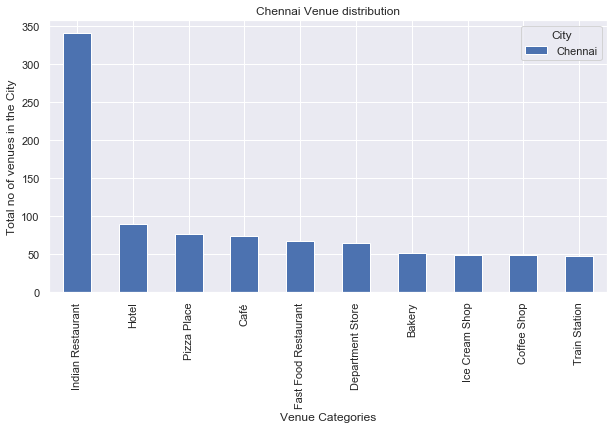

In [324]:
city_grouped.sort_values([city],ascending=False,inplace=True)
city_grouped.iloc[0:10].plot(kind='bar',figsize=(10,5))
plt.title(city + ' Venue distribution')
plt.ylabel('Total no of venues in the City')
plt.xlabel('Venue Categories')

## Now we will find the top 10 most common venues

In [325]:
# First, let's write a function to sort the venues in descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [326]:
city_grouped = city_onehot.groupby('Neighborhood').mean().reset_index()
city_grouped.head()

,Neighborhood,Yoga Studio,ATM,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Amphitheater,Arcade,...,Theme Park,Tourist Information Center,Train,Train Station,Travel & Transport,Vegetarian / Vegan Restaurant,Video Store,Watch Shop,Whisky Bar,Women's Store
0,Adyar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.014706,...,0.0,0.0,0.0,0.000000,0.0,0.014706,0.0,0.014706,0.0,0.014706
1,Alandur,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.058824,0.0,0.000000,0.0,0.000000,0.0,0.000000
2,Alapakkam,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
3,Alwarthirunagar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
4,Ambattur,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000


In [327]:
# Now let's create the new dataframe and display the top 10 venues for each neighborhood.
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = city_grouped['Neighborhood']

for ind in np.arange(city_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(city_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adyar,Indian Restaurant,Café,Department Store,Pizza Place,Asian Restaurant,Electronics Store,North Indian Restaurant,Fast Food Restaurant,Rock Club,Juice Bar
1,Alandur,Indian Restaurant,Bakery,Hotel,Metro Station,Church,Multiplex,Kebab Restaurant,Pizza Place,Café,Train Station
2,Alapakkam,Pharmacy,Movie Theater,Women's Store,Food Service,Food Court,Food & Drink Shop,Food,Flower Shop,Flea Market,Fast Food Restaurant
3,Alwarthirunagar,Fast Food Restaurant,Indian Restaurant,Clothing Store,Movie Theater,Gym,Café,Chinese Restaurant,Tea Room,Ice Cream Shop,Pizza Place
4,Ambattur,Ice Cream Shop,Flea Market,Movie Theater,River,Multiplex,Food Service,Food & Drink Shop,Food,Flower Shop,Fast Food Restaurant


## After finding the top 10 venues in a neighborhood, the neighborhood will be clustered by kmeans algorithm

In [328]:
# import necessary packages
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

## Find optimal k for the clustering process.

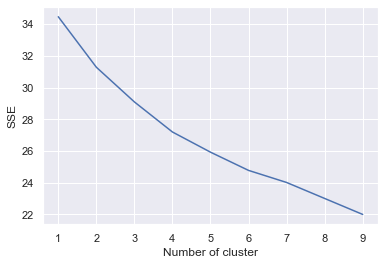

In [329]:
city_grouped_clustering = city_grouped.drop('Neighborhood', 1)

sse = {}
for k in range(1, 10):
    # run k-means clustering
    kmeans = KMeans(n_clusters=k, random_state=0,max_iter = 1000).fit(city_grouped_clustering)
    city_grouped_clustering["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

## From the graph we find the elbow point an then use it to cluster the neighborhoods.

In [330]:
# set number of clusters
kclusters = 6

city_grouped_clustering = city_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(city_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([4, 4, 0, 1, 1, 1, 1, 4, 0, 4])

In [331]:
df = pd.read_csv(city + '_subdiv.csv',index_col=0)
df.head()

,Neighborhood,City,Latitude,Longitude
0,Red Hills,Chennai,13.19543,80.184303
1,Ayanavaram,Chennai,13.09883,80.232384
2,Royapuram,Chennai,13.11396,80.294220
3,Korukkupet,Chennai,13.11680,80.277298
4,Vyasarpadi,Chennai,13.11778,80.251678


## Add clustering labels to the dataframe

In [332]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

city_merged = df

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
city_merged = city_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

# drop the column with nan values after join
city_merged.dropna(inplace=True)

city_merged.head() # check the last columns!

,Neighborhood,City,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Red Hills,Chennai,13.19543,80.184303,4.0,Multiplex,Gym,Indian Restaurant,Spa,Bus Station,Food Court,Food & Drink Shop,Food,Flower Shop,Flea Market
1,Ayanavaram,Chennai,13.09883,80.232384,1.0,Department Store,Indie Movie Theater,Ice Cream Shop,Farm,Food Service,Food Court,Food & Drink Shop,Food,Flower Shop,Flea Market
2,Royapuram,Chennai,13.11396,80.294220,4.0,Indian Restaurant,Pizza Place,Ice Cream Shop,Spa,Pier,Dessert Shop,Park,Convenience Store,Herbs & Spices Store,Diner
3,Korukkupet,Chennai,13.11680,80.277298,1.0,Vegetarian / Vegan Restaurant,Boutique,Indie Movie Theater,Train Station,Farm,Food Service,Food Court,Food & Drink Shop,Food,Flower Shop
4,Vyasarpadi,Chennai,13.11778,80.251678,1.0,Pizza Place,Currency Exchange,Department Store,Chinese Restaurant,Women's Store,Farm,Food Court,Food & Drink Shop,Food,Flower Shop


## After clustering the data will be visualized in folium.

In [333]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import folium

### Create a function to ge the lat and long of the center of city using geocoder API

In [334]:
# use geocoder library, if not present use !conda install -c conda-forge geocoder
import geocoder
# Google API key is required for the geocoder library to work, save the API key in OS environment variables as GOOGLE_API_KEY
# and then access thay key here
import os
# Use BING_API_KEY when choosing to use bing geocoding instead of google geocoding.
BING_API_KEY = 'AksNN-3luSfNBssyZ3Ju4i78nIrFLt1UtYo--YWQj9oyfxSwyXkdsqykWk3FeTXB' # os.environ['BING_API_KEY']

# This function will take an adress and return the latlng of that adress
def get_latlng(address):
    # using bing geocoder API since it is better.
    g = geocoder.bing(address, key = BING_API_KEY)
    return pd.Series(g.latlng)

In [335]:
# get latitude and longitude of city to center the map
latitude, longitude = get_latlng(city)
print('Lat : ',latitude,' Long : ',longitude)

Lat :  13.083620071411133  Long :  80.28251647949219


## Visualize the neighborhoods before clustering

In [336]:
# Function takes in a data frame with Latitude, Longitude, Neighborhood and City columns and shows it on map
def visualize_area_in_map(data):
    # add markers to map
    for lat, lng, neighborhood, city in zip(data['Latitude'], data['Longitude'], data['Neighborhood'], data['City']):
        label = '{}, {}'.format(neighborhood, city)
        label = folium.Popup(label, parse_html=True)
        folium.CircleMarker(
            [lat, lng],
            radius=2,
            popup=label,
            color='blue',
            fill=True,
            fill_color='#3186cc',
            fill_opacity=0.7,
            parse_html=False).add_to(map)  
    
    return map

In [337]:
# create map of Toronto using latitude and longitude values
map = folium.Map(location=[latitude, longitude], zoom_start=10)

# data to be used for map
data = df.dropna()

visualize_area_in_map(data)

## Visualize the clusters

In [338]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(city_merged['Latitude'], city_merged['Longitude'], city_merged['Neighborhood'], city_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=4,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.9).add_to(map_clusters)
       
map_clusters

## Exploring the clusters

In [339]:
# print the cluster
city_merged.loc[city_merged['Cluster Labels'] == 0, city_merged.columns[[1] + list(range(5, city_merged.shape[1]))]]

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
14,Chennai,Pharmacy,Indian Restaurant,Food Service,Food Court,Food & Drink Shop,Food,Flower Shop,Flea Market,Fast Food Restaurant,Farmers Market
92,Chennai,Pharmacy,Indian Restaurant,Food Service,Food Court,Food & Drink Shop,Food,Flower Shop,Flea Market,Fast Food Restaurant,Farmers Market
94,Chennai,Pharmacy,Movie Theater,Women's Store,Food Service,Food Court,Food & Drink Shop,Food,Flower Shop,Flea Market,Fast Food Restaurant
101,Chennai,Pharmacy,Medical Supply Store,Farmers Market,Food Truck,Food Service,Food Court,Food & Drink Shop,Food,Flower Shop,Flea Market
166,Chennai,Pharmacy,Indian Restaurant,Food Service,Food Court,Food & Drink Shop,Food,Flower Shop,Flea Market,Fast Food Restaurant,Farmers Market


In [340]:
city_merged.loc[city_merged['Cluster Labels'] == 1, city_merged.columns[[1] + list(range(5, city_merged.shape[1]))]]

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Chennai,Department Store,Indie Movie Theater,Ice Cream Shop,Farm,Food Service,Food Court,Food & Drink Shop,Food,Flower Shop,Flea Market
3,Chennai,Vegetarian / Vegan Restaurant,Boutique,Indie Movie Theater,Train Station,Farm,Food Service,Food Court,Food & Drink Shop,Food,Flower Shop
4,Chennai,Pizza Place,Currency Exchange,Department Store,Chinese Restaurant,Women's Store,Farm,Food Court,Food & Drink Shop,Food,Flower Shop
5,Chennai,Platform,Beach,Historic Site,Harbor / Marina,Women's Store,Farm,Food Court,Food & Drink Shop,Food,Flower Shop
6,Chennai,Convenience Store,ATM,Train Station,Bus Station,Farm,Food Service,Food Court,Food & Drink Shop,Food,Flower Shop
8,Chennai,Electronics Store,Paper / Office Supplies Store,Scenic Lookout,Train Station,Farm,Food Court,Food & Drink Shop,Food,Flower Shop,Flea Market
9,Chennai,Women's Store,Bus Station,Vegetarian / Vegan Restaurant,Department Store,Food Service,Food Court,Food & Drink Shop,Food,Flower Shop,Flea Market
10,Chennai,ATM,Food & Drink Shop,Moving Target,Juice Bar,Bus Station,Women's Store,Fast Food Restaurant,Food Service,Food Court,Food
15,Chennai,Asian Restaurant,Coffee Shop,Burger Joint,Tourist Information Center,Gym,Farm,Food Court,Food & Drink Shop,Food,Flower Shop
17,Chennai,Asian Restaurant,Coffee Shop,Bakery,Tourist Information Center,Farm,Food Service,Food Court,Food & Drink Shop,Food,Flower Shop


In [341]:
city_merged.loc[city_merged['Cluster Labels'] == 2, city_merged.columns[[1] + list(range(5, city_merged.shape[1]))]]

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
55,Chennai,ATM,Women's Store,Farmers Market,Food Truck,Food Service,Food Court,Food & Drink Shop,Food,Flower Shop,Flea Market
84,Chennai,ATM,Women's Store,Farmers Market,Food Truck,Food Service,Food Court,Food & Drink Shop,Food,Flower Shop,Flea Market


In [342]:
city_merged.loc[city_merged['Cluster Labels'] == 3, city_merged.columns[[1] + list(range(5, city_merged.shape[1]))]]

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
38,Chennai,Indian Restaurant,Whisky Bar,Food Truck,Food Service,Food Court,Food & Drink Shop,Food,Flower Shop,Flea Market,Fast Food Restaurant
44,Chennai,Indian Restaurant,Whisky Bar,Food Truck,Food Service,Food Court,Food & Drink Shop,Food,Flower Shop,Flea Market,Fast Food Restaurant
57,Chennai,Indian Restaurant,Department Store,Hotel,Farm,Food Service,Food Court,Food & Drink Shop,Food,Flower Shop,Flea Market
89,Chennai,Indian Restaurant,Italian Restaurant,Middle Eastern Restaurant,Asian Restaurant,Deli / Bodega,Fast Food Restaurant,Food Truck,Food Service,Food Court,Food & Drink Shop
140,Chennai,Indian Restaurant,Vegetarian / Vegan Restaurant,Adult Boutique,Pizza Place,Chinese Restaurant,Women's Store,Farm,Food Court,Food & Drink Shop,Food
165,Chennai,Indian Restaurant,Vegetarian / Vegan Restaurant,Adult Boutique,Pizza Place,Chinese Restaurant,Women's Store,Farm,Food Court,Food & Drink Shop,Food


In [343]:
city_merged.loc[city_merged['Cluster Labels'] == 4, city_merged.columns[[1] + list(range(5, city_merged.shape[1]))]]

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Chennai,Multiplex,Gym,Indian Restaurant,Spa,Bus Station,Food Court,Food & Drink Shop,Food,Flower Shop,Flea Market
2,Chennai,Indian Restaurant,Pizza Place,Ice Cream Shop,Spa,Pier,Dessert Shop,Park,Convenience Store,Herbs & Spices Store,Diner
13,Chennai,Indian Restaurant,Convenience Store,Department Store,Market,Fast Food Restaurant,Harbor / Marina,Asian Restaurant,Video Store,Dessert Shop,Diner
16,Chennai,Indian Restaurant,Dessert Shop,Business Service,Pharmacy,Daycare,Food Service,Food Court,Food & Drink Shop,Food,Flower Shop
19,Chennai,Indian Restaurant,Platform,Hotel,Train Station,Asian Restaurant,Museum,Moving Target,Bus Station,Sandwich Place,Bookstore
20,Chennai,Indian Restaurant,Pizza Place,Bus Stop,Astrologer,Women's Store,Farm,Food Court,Food & Drink Shop,Food,Flower Shop
21,Chennai,Indian Restaurant,Platform,Harbor / Marina,Market,Bus Station,Moving Target,Asian Restaurant,Museum,Bookstore,Sandwich Place
22,Chennai,Hotel,Indian Restaurant,Pizza Place,Café,Farmers Market,Hotel Bar,Movie Theater,Juice Bar,Asian Restaurant,Diner
26,Chennai,Hotel,Indian Restaurant,Vegetarian / Vegan Restaurant,Train Station,Bookstore,Hotel Bar,Soccer Stadium,Nightclub,Pizza Place,Department Store
27,Chennai,Ice Cream Shop,Indian Restaurant,Train Station,Spa,Fast Food Restaurant,Farm,Food Service,Food Court,Food & Drink Shop,Food


In [344]:
city_merged.loc[city_merged['Cluster Labels'] == 5, city_merged.columns[[1] + list(range(5, city_merged.shape[1]))]]

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
134,Chennai,Gym / Fitness Center,Breakfast Spot,Supermarket,Women's Store,Food Court,Food & Drink Shop,Food,Flower Shop,Flea Market,Fast Food Restaurant
139,Chennai,Gym / Fitness Center,Women's Store,Fried Chicken Joint,Food Service,Food Court,Food & Drink Shop,Food,Flower Shop,Flea Market,Fast Food Restaurant
